# Sınıflandırma Problemleri

In [5]:
!pip install catboost
!pip install lightgbm

     |████████████████████████████████| 69.2 MB 4.2 kB/s eta 0:00:011    |██████▏                         | 13.2 MB 5.2 MB/s eta 0:00:11     |████████                        | 17.5 MB 5.2 MB/s eta 0:00:10     |█████████▌                      | 20.4 MB 8.1 MB/s eta 0:00:07     |███████████████▍                | 33.3 MB 6.1 MB/s eta 0:00:06     |████████████████████████████▉   | 62.4 MB 31.4 MB/s eta 0:00:01     |██████████████████████████████  | 65.1 MB 31.4 MB/s eta 0:00:01
     |████████████████████████████████| 20.6 MB 34 kB/s  eta 0:00:01


In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Lojistik Regresyon 

## Model 

In [2]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [19]:
df["Outcome"].value_counts() # Outcome'da kaç tane O ve 1 değeri var.

0    500
1    268
Name: Outcome, dtype: int64

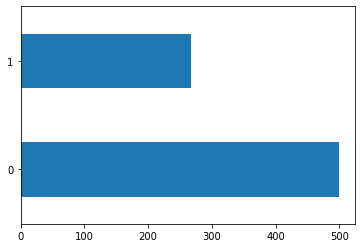

In [4]:
df["Outcome"].value_counts().plot.barh();

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [3]:
y = df["Outcome"] 
X = df.drop(["Outcome"], axis=1) # Outcome'ı çıkardık.

In [9]:
#statsmodels

In [4]:
loj = sm.Logit(y, X) # Logit modeli kurduk.
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Mon, 19 Jul 2021   Pseudo R-squ.:                 0.05922
Time:                        18:56:52   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [5]:
# Statsmodel ile logaritmik dönüşüm yapıldı değerlere.
# BU yüzden bu dönüşümü geri alıp katxayıları ve bağımsız değişkenleri tekrar yorumlamalıyız.
# Bunun için de scikit-learn kullanılır.
# Çıkan değer üzerinden bağımlı değişkene etki gözlemlenir.

In [6]:

#scikit-learn

In [7]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
loj_model.intercept_ # Başlangıç, otonom değer

array([-5.83844276])

In [9]:
loj_model.coef_ # Bağımsız değişken katsayıları.

array([[ 1.16929984e-01,  2.82448586e-02, -1.69681581e-02,
         7.65753014e-04, -6.30060588e-04,  5.91725100e-02,
         6.67861727e-01,  7.08236018e-03]])

## Tahmin & Model Tuning

In [17]:
# Lojistik regresyonun diğer modeller gibi bir hiperparametresi yok
# Sınıflandırma problemlerinde ilgilendiğimiz sınıfın diğerleri ile karışması sorunu ortaya çıkabilir.
# Bu yüzden (kanserli-kansersiz, ödeyecek mi- ödeyemeyecek mi?)
# Sınıflar doğru mu kontrol etmen lazım.

In [ ]:
# Her bir bağımsız değişkeni katsayıları ile çarpıp otonom değeri eklediğimizde tahmin değerine ulaşabiliriz.


In [18]:
y_pred = loj_model.predict(X) # Henüz test-train diye ayırmadık. Modeli anlamaya çalışıyoruz.

In [19]:
confusion_matrix(y, y_pred) # Karmaşıklk matrisi

array([[448,  52],
       [121, 147]])

In [33]:
accuracy_score(y, y_pred)

0.7747395833333334

In [34]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [35]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [36]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.35135889, 0.64864111],
       [0.91652333, 0.08347667],
       [0.22513673, 0.77486327],
       [0.92079448, 0.07920552],
       [0.16874003, 0.83125997],
       [0.79824927, 0.20175073],
       [0.87936303, 0.12063697],
       [0.27713092, 0.72286908],
       [0.32074724, 0.67925276],
       [0.92211384, 0.07788616]])

In [37]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [38]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [39]:
y_probs[0:10]

array([0.64864111, 0.08347667, 0.77486327, 0.07920552, 0.83125997,
       0.20175073, 0.12063697, 0.72286908, 0.67925276, 0.07788616])

In [40]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [41]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [42]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]])

In [43]:
accuracy_score(y, y_pred)

0.7747395833333334

In [44]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [45]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.64864111, 0.08347667, 0.77486327, 0.07920552, 0.83125997])

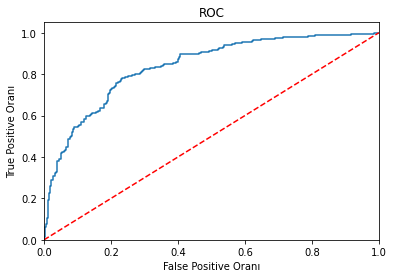

In [46]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [48]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7575757575757576

In [50]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7661231884057971

# Gaussian Naive Bayes

In [37]:
# Olasılık temelli bir modelleme tekniğidir.
# Amaç belirli bir örneğin her bir sınıfa ait olma olasılığının koşullu olasılık
# olarak temellinde hesaplanmasıdır.
# çOK SINIFLI yanıt değişkeni ve bagımsız değişkenleri arasında kategorik değişken varsa bayes iyi çalışıypr modellemelerde.
# e-ticaret ya da kredi ödenmiş mi?


In [38]:
# Naive bayes algoritmasında da tune edilecek bir dışşal parametre yoktur.

In [39]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)



In [49]:
# Test size belirlenmesinde,
#  Sınıfların frekans dağılımı çok dengesizse
df["Outcome"].value_counts() # Outcome'da kaç tan

0    500
1    268
Name: Outcome, dtype: int64

In [51]:
# Mesela bunda çok dengesiz değil ama, 10.000'e 1000 gibi olursa
# Dengesiz olursa, test ve train bağımlı değişken sınıflarını inceleyip test size'ını ona göre ayarla.
# Bu datada teste daha çok pay ayırdık sınıflandırma görece dengesiz olduğu için

In [40]:
from sklearn.naive_bayes import GaussianNB

In [43]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [52]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [46]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [53]:
y_pred = nb_model.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [55]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

# KNN

In [56]:
# KNN Basamakları

# Komşu sayısını belirle
# Bilinmeyen nokta ile diğer tüm noktalar arasındaki uzaklıkları hesapla(öklid ya da başka bir metrik)
# Uzaklıkları sırala ve belirlenen k sayısına göre en yakın olan k gözlemi seç
# Sınıflandırma ise en sık sınıf, regresyon ise ortalama değeri thamin değeri olarak ver.

## Model & Tahmin

In [5]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [6]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [7]:
y_pred = knn_model.predict(X_test)

In [8]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



## Model Tuning

In [10]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [11]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [12]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.748637316561845
En iyi parametreler: {'n_neighbors': 11}


In [ ]:
# En iyi 11 neighbors ile oluyor

In [13]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [14]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [15]:
# Aynı skoru tune edilen model ile elde edebiliriz.
y_pred = knn_tuned.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred)

0.7316017316017316

# SVC (support vector classification)

## Model & Tahmin

In [17]:
# Amaç iki sınıf arasındaki ayrımın optimum olmasını sağlayacak
# hiper düzlemin bulunmasıdır.
# Sınıflandırma ve regresyon
# dOĞRUSAL OLMAYANDA kernel uygulaması ve boyut arttırma

In [25]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [27]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [28]:
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
y_pred = svm_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

## Model Tuning

In [30]:
# C parametresinin tune edilmesi gerekiyor

svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 11.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [31]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 5}


In [32]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [33]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# RBF SVC
# Radial Base function

## Model & Tahmin

In [34]:
# Doğrusal olmayan sınıflandırma modeli
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [35]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [36]:
svc_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
#dir(svc_model)

In [37]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [39]:
# Gamma parametresi oldukça önemli bu modelde
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [40]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   22.7s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [41]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 10, 'gamma': 0.0001}


In [42]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# Yapay Sinir Ağları

## Model & Tahmin

In [ ]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [48]:
# Doğrusal olmayan modellerde standartlaştırma yapmamız lazım
# Değişkenlerin ölçekleri sebebiyle
from sklearn.preprocessing import StandardScaler  

In [47]:
scaler = StandardScaler()

In [49]:
# Dönüştürme işlemini hem train hem de test seti için yaptık.
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [52]:
# mlpc : multilayer perceptron classification
from sklearn.neural_network import MLPClassifier

In [53]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [54]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7229437229437229

## Model Tuning

In [55]:
mlpc

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [56]:
?mlpc

Type:        MLPClassifier
String form:
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_ <...>               tol=0.0001, validation_fraction=0.1, verbose=False,
           warm_start=False)
File:        ~/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperb

In [57]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


In [58]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 10.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 

In [60]:
# Grid search sonucu en iyi parametreleri nelirledik
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'solver': 'sgd'}


In [61]:
# Yukarıda seçtiğimiz en iyi parametreleri çalıştıralım
mlpc_tuned = MLPClassifier(activation = "relu", 
                           alpha = 0.0001, 
                           hidden_layer_sizes = (100, 100),
                          solver = "sgd")

In [62]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [63]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7359307359307359

# CART

## Model & Tahmin

In [ ]:
# Amaç veri seti içindeki karmaşık yapıları basit karar yapılarına çevirmktir.
# Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.

In [90]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
cart = DecisionTreeClassifier(max_depth = 2)
cart_model = cart.fit(X_train, y_train)

In [68]:
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [69]:
#pip install skompiler
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((1 if x[1] <= 123.0 else 0) if x[5] <= 
    37.39999961853027 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (
    0 if x[6] <= 0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else
    0) if x[0] <= 4.5 else 1 if x[7] <= 26.5 else 0) if x[5] <= 
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 1 if x[2] <= 69.5 else 0) if x[5] <= 
    30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if x[5
    ] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else
    0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else (1 if x[7] <= 29.5 else
    (0 if x[1] <= 133.0 else (1 if x[1] <= 135.5 else 0) if x[2] <= 73.0 else
    0) if x[2] <= 94.0 else 0 if x[7] <= 44.0 else 1) if x[5] <= 
    26.949999809265137 else (1 if x[1] <= 28.5 e

In [ ]:
# Değişken sayısı çok fazla karar ağacı için bu yuzden.
# Pregnancies değişkeni üzerinden model kurabiliriz.

In [70]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
#X = df.drop(['Outcome'], axis=1)
X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [72]:
# Max depth parametresini değiştirdik
cart = DecisionTreeClassifier(max_depth = 2)
cart_model = cart.fit(X_train, y_train)
cart_model
cart_model


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [74]:
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))
# Kural yapısını çıkarmış olduk python code'u olarak.

((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)



In [87]:
x = [9] # 9 hamilelik geçirmiş olsun.

In [88]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [92]:
# İlkel Tahmin hatamız

df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)
cart_model
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [93]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6926406926406926

## Model Tuning

In [94]:
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [95]:
?cart_model

Type:        DecisionTreeClassifier
String form:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
           <...> action_leaf=0.0, presort='deprecated',
           random_state=None, splitter='best')
File:        ~/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_sa

In [ ]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [ ]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

In [ ]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

In [ ]:
#final

In [ ]:
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)
cart_tuned = cart.fit(X_train, y_train)

In [ ]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# Random Forests

In [13]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [16]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

## Model Tuning

In [18]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
?rf_model 
# iki parametre var önemli
# Ağaç sayısı ve değişken sayısı.

Type:        RandomForestClassifier
String form:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
           c <...> obs=None, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Length:      100
File:        ~/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : integer, optional (default=100)
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : st

In [21]:
# Parametre grid'i oluşturalım
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

# n estimators ağaç sayısıdır.

In [22]:
# Grid search
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [23]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 10.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [25]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 10, 'max_features': 8, 'min_samples_split': 5, 'n_estimators': 500}


In [ ]:
#final

In [26]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 8, 
                                  min_samples_split = 10,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

In [28]:
# Önemli olan gerçek hayatla ilişki kurabilmen ve bunu bir ürüne dönüştürebilmen
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

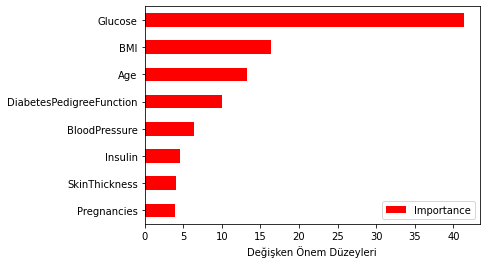

In [29]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

In [30]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [33]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [34]:
gbm_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
?gbm_model

In [39]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [40]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [41]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  4.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

In [42]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [43]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                min_samples_split = 5,
                                n_estimators = 500)

In [44]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [45]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

# XGBoost

In [46]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [47]:
#!pip install xgboost
from xgboost import XGBClassifier

In [48]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [49]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [51]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
?xgb_model

In [52]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [53]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [54]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 385 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1033 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1478 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2061 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2668 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 3357 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 4126 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 4977 tasks      | elapsed: 13.6min


[20:32:00] WARNING: ../src/learner.cc:516: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 15.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_esti...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             

In [ ]:
xgb_cv_model.best_params_

In [ ]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 6,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.8)

In [ ]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# LightGBM

In [3]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
conda update -n base -c defaults conda

In [ ]:
!conda install -c conda-forge lightgbm
from lightgbm import LGBMClassifier

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.4
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/halimcan/anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py37h89c1867_0         3.1 MB  conda-forge
    lightgbm-3.1.1             |   py37h2531618_0         1.3 MB
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following NEW packages will be INSTALLED:

  lightgbm           pkgs/main/linux-64::lightgbm-3.1.1-py37h2531618_0
  python_abi         conda-forge/linux-64::python_abi-3.7-2_cp37m

In [ ]:
y

In [ ]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [ ]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
## Model Tuning

In [ ]:
lgbm_model

In [ ]:
?lgbm_model

In [ ]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [ ]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)



In [ ]:
lgbm_cv_model.fit(X_train, y_train)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 20)

In [ ]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# CatBoost

## Model & Tahmin

In [ ]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
#!pip install catboost
from catboost import CatBoostClassifier

In [ ]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

In [ ]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

## Model Tuning

In [ ]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [ ]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.05, 
                          depth = 5)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

In [ ]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# Tüm Modellerin Karşılaştırılması

In [ ]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

In [ ]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    